### Import required dependencies

In [1]:
import pandas as pd
import os

## Deliverable 1: Collect the Data

To collect the data that you’ll need, complete the following steps:

1. Using the Pandas `read_csv` function and the `os` module, import the data from the `new_full_student_data.csv` file, and create a DataFrame called student_df. 

2. Use the head function to confirm that Pandas properly imported the data.


In [2]:
# Create the path and import the data
full_student_data = os.path.join('../Resources/new_full_student_data.csv')
student_df = pd.read_csv(full_student_data)

In [3]:
# Verify that the data was properly imported
display(student_df.head())

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
0,103880842,Travis Martin,9th,Sullivan High School,59.0,88.2,Public,961125
1,45069750,Michael Brown,9th,Dixon High School,94.7,73.5,Charter,870334
2,45024902,Gabriela Lucero,9th,Wagner High School,89.0,70.4,Public,846745
3,62582498,Susan Richardson,9th,Silva High School,69.7,80.3,Public,991918
4,16437227,Sherry Davis,11th,Bowers High School,NaN,27.5,Public,848324


## Deliverable 2: Prepare the Data

To prepare and clean your data for analysis, complete the following steps:
    
1. Check for and remove all rows with `NaN`, or missing, values in the student DataFrame. 

2. Check for and remove all duplicate rows in the student DataFrame.

3. Use the `str.replace` function to remove the "th" from the grade levels in the grade column.

4. Check data types using the `dtypes` property.

5. Remove the "th" suffix from every value in the grade column using `str` and `replace`.

6. Change the grade colum to the `int` type and verify column types.

7. Use the head (and/or the tail) function to preview the DataFrame.

In [4]:
# Check for null values
student_df.count()

student_id       19514
student_name     19514
grade            19514
school_name      19514
reading_score    17546
math_score       18532
school_type      19514
school_budget    19514
dtype: int64

In [5]:
# Drop rows with null values and verify removal
no_null_df = student_df.dropna(how='any')
no_null_df.count()

student_id       16667
student_name     16667
grade            16667
school_name      16667
reading_score    16667
math_score       16667
school_type      16667
school_budget    16667
dtype: int64

In [6]:
# Check for duplicated rows
no_null_df.duplicated(keep='first').sum()

1836

In [7]:
# Drop duplicated rows and verify removal
cleaned_df = no_null_df.copy()
cleaned_df.drop_duplicates(inplace=True)
cleaned_df.duplicated(keep='first').sum()

0

In [8]:
# Check data types
cleaned_df.dtypes

student_id         int64
student_name      object
grade             object
school_name       object
reading_score    float64
math_score       float64
school_type       object
school_budget      int64
dtype: object

In [9]:
# Examine the grade column to understand why it is not an int
cleaned_df['grade']

0         9th
1         9th
2         9th
3         9th
5         9th
         ... 
19508    10th
19509    12th
19511    11th
19512    11th
19513    12th
Name: grade, Length: 14831, dtype: object

In [10]:
# Remove the non-numeric characters and verify the contents of the column
import re
cleaned_df['grade'] = [re.sub('[^0-9]', '', x) for x in cleaned_df['grade']]
cleaned_df['grade']

0         9
1         9
2         9
3         9
5         9
         ..
19508    10
19509    12
19511    11
19512    11
19513    12
Name: grade, Length: 14831, dtype: object

In [11]:
# Change the grade column to the int type and verify column types
cleaned_df['grade'] = cleaned_df['grade'].astype(int)
cleaned_df.dtypes

student_id         int64
student_name      object
grade              int64
school_name       object
reading_score    float64
math_score       float64
school_type       object
school_budget      int64
dtype: object

## Deliverable 3: Summarize the Data

Describe the data using summary statistics on the data as a whole and on individual columns.

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. Display the mean math score using the `mean` function. 

2. Store the minimum reading score as `min_reading_score`.

In [12]:
# Display summary statistics for the DataFrame
cleaned_df.describe()

,student_id,grade,reading_score,math_score,school_budget
count,1.483100e+04,14831.000000,14831.000000,14831.000000,14831.000000
mean,6.975296e+07,10.355539,72.357865,64.675733,893742.749107
std,3.452909e+07,1.097728,15.224590,15.844093,53938.066467
min,1.000906e+07,9.000000,10.500000,3.700000,817615.000000
25%,3.984433e+07,9.000000,62.200000,54.500000,846745.000000
50%,6.965978e+07,10.000000,73.800000,65.300000,893368.000000
75%,9.927449e+07,11.000000,84.000000,76.000000,956438.000000
max,1.299997e+08,12.000000,100.000000,100.000000,991918.000000


In [13]:
# Display the mean math score using the mean function
cleaned_df['math_score'].mean()

64.67573326141189

In [14]:
# Store the minimum reading score as min_reading_score
min_reading_score = cleaned_df['reading_score'].min()
min_reading_score

10.5

## Deliverable 4: Drill Down into the Data

Drill down to specific rows, columns, and subsets of the data.

To drill down into the data, complete the following steps:

1. Use `loc` to display the grade column.

2. Use `iloc` to display the first 3 rows and columns 3, 4, and 5.

3. Show the rows for grade nine using `loc`.

4. Store the row with the minimum overall reading score as `min_reading_row` using `loc` and the `min_reading_score` found in Deliverable 3.

5. Find the reading scores for the school and grade from the output of step three using `loc` with multiple conditional statements.

6. Using conditional statements and `loc` or `iloc`, find the mean reading score for all students in grades 11 and 12 combined.

In [15]:
# Use loc to display the grade column
cleaned_df.iloc[:,2]

0         9
1         9
2         9
3         9
5         9
         ..
19508    10
19509    12
19511    11
19512    11
19513    12
Name: grade, Length: 14831, dtype: int64

In [16]:
# Use `iloc` to display the first 3 rows and columns 3, 4, and 5.
cleaned_df.iloc[[0,1,2],[3,4,5]]

,school_name,reading_score,math_score
0,Sullivan High School,59.0,88.2
1,Dixon High School,94.7,73.5
2,Wagner High School,89.0,70.4


In [17]:
# Select the rows for grade nine and display their summary statistics using `loc` and `describe`.
nine_mean=cleaned_df.loc[cleaned_df['grade'] == 9]
nine_mean.describe()

,student_id,grade,reading_score,math_score,school_budget
count,4.132000e+03,4132.0,4132.000000,4132.000000,4132.000000
mean,6.979441e+07,9.0,69.236713,66.585624,898692.606002
std,3.470565e+07,0.0,15.277354,16.661533,54891.596611
min,1.000906e+07,9.0,17.900000,5.300000,817615.000000
25%,3.953848e+07,9.0,59.000000,56.000000,846745.000000
50%,6.984037e+07,9.0,70.050000,67.800000,893368.000000
75%,9.939504e+07,9.0,80.500000,78.500000,957299.000000
max,1.299997e+08,9.0,99.900000,100.000000,991918.000000


In [18]:
# Store the row with the minimum overall reading score as `min_reading_row`
# using `loc` and the `min_reading_score` found in Deliverable 3.
cleaned_df.loc[cleaned_df['reading_score'] == min_reading_score]

,student_id,student_name,grade,school_name,reading_score,math_score,school_type,school_budget
3706,81758630,Matthew Thomas,10,Dixon High School,10.5,58.4,Charter,870334


In [19]:
# Use loc with conditionals to select all reading scores from 10th graders at Dixon High School.
tenth_reading=cleaned_df.loc[(cleaned_df["grade"]==10)&(cleaned_df["school_name"]=='Dixon High School'),["student_name","grade","reading_score","school_name"]]
tenth_reading

,student_name,grade,reading_score,school_name
45,Ryan Charles,10,71.1,Dixon High School
60,Jeremiah Smith,10,59.5,Dixon High School
69,Troy Doyle,10,88.6,Dixon High School
94,Matthew Lewis,10,81.5,Dixon High School
100,Jonathan Bell,10,95.3,Dixon High School
...,...,...,...,...
19283,Carol Sanford,10,52.9,Dixon High School
19306,John Gibson,10,58.0,Dixon High School
19344,Cynthia Doyle,10,38.0,Dixon High School
19368,Michelle Moore,10,84.4,Dixon High School


In [20]:
# Find the mean reading score for all students in grades 11 and 12 combined.
jrsr_reading=cleaned_df.loc[(cleaned_df["grade"]>=11)]
jrsr_reading['reading_score'].mean()

74.90038089192188

## Deliverable 5: Make Comparisons Between District and Charter Schools

Compare district vs charter schools for budget, size, and scores.

Make comparisons within your data by completing the following steps:

1. Using the `groupby` and `mean` functions, look at the average reading and math scores per school type.

1. Using the `groupby` and `count` functions, find the total number of students at each school.

2. Using the `groupby` and `mean` functions, find the average budget per grade for each school type.

In [21]:
# Use groupby and mean to find the average budget for each school type.
grouped_school_type = cleaned_df.groupby(['school_type'])
grouped_school_type[["school_budget"]].mean()

,school_budget
school_type,
Charter,872625.656236
Public,911195.558251


In [22]:
# Use the `groupby`, `count`, and `sort_values` functions to find the
# total number of students at each school and sort from most students to least students.
cleaned_df['count'] = cleaned_df.groupby('school_name')['school_name'].transform('count')
totals=cleaned_df.groupby('school_name').count()
student_totals=totals.sort_values(by=["count"], ascending=False)
student_totals[['count']]

,count
school_name,
Montgomery High School,2038
Green High School,1961
Dixon High School,1583
Wagner High School,1541
Silva High School,1109
Woods High School,1052
Sullivan High School,971
Turner High School,846
Bowers High School,803


In [85]:
#Find the average math score by grade for each school type by using the groupby and mean functions.
grouped_data = cleaned_df.groupby(['school_type', 'grade'])[['math_score']].mean()
grouped_data.round()

math_score
school_type grade            
Charter     9            70.0
            10           66.0
            11           68.0
            12           60.0
Public      9            64.0
            10           64.0
            11           59.0
            12           64.0

# Deliverable 6: Summarize Your Findings
In the cell below, write a few sentences to describe any discoveries you made while performing your analysis along with any additional analysis you believe would be worthwhile.

In the data below, it shows that even though public schools receive more funding than charter schools on average, their math scores are higher.  
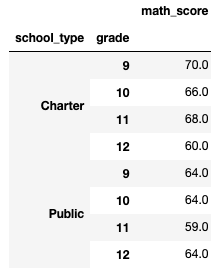

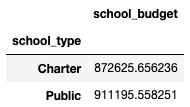

Another observation is that Sullivan High School performed better than the all of the schools in math and Dixon high school, performed better in reading.
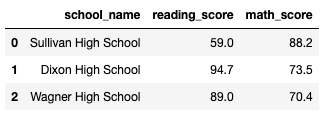

Having reviewed school data before, I would like to see the subgroups of students identified.  Subgroups would be beneficial to see the correlation to student achievement.  A subgroup of classification would be very beneficial.